# Welcome to the Machine Learning Workshop!

### Lets first set up our initial Imports and setup our problem!

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris


iris = load_iris()

iris.__dict__

features = iris.data
target = iris.target



Let's first take a look at the data (uncomment the two cells below and click play on both of them to view the array)

In [5]:
print(f'The first row of data is: {features[0, :]}\nThe features are{iris.feature_names}') 


The first row of data is: [5.1 3.5 1.4 0.2]
The features are['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [7]:
print(f'The first row of data is: {target[0]}\nThe features are{iris.target_names}')


The first row of data is: 0
The features are['setosa' 'versicolor' 'virginica']


### Lets Look at some summary statistics

In [9]:
mean = np.mean(features, axis=0)
var = np.var(features, axis=0)
sd = np.std(features, axis = 0)
mini = np.min(features, axis = 0) 
maxi = np.max(features, axis = 0)

print(f'The mean is: {mean}. \nThe variance: {var}. \nThe Standard Deviance  {sd}. \nThe minimum is {mini}. \nThe maximum is {maxi}')

The mean is: [5.84333333 3.05733333 3.758      1.19933333]. 
The variance: [0.68112222 0.18871289 3.09550267 0.57713289]. 
The Standard Deviance  [0.82530129 0.43441097 1.75940407 0.75969263]. 
The minimum is [4.3 2.  1.  0.1]. 
The maximum is [7.9 4.4 6.9 2.5]


### Now we are going to split our data up into training and testing data

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target)


By executing the cell above, we get four resulting numpy arrays:

- X_train: The is the training data that has all of our feature data

- X_test: The testing data that has all of our feature data

- y_train: The training data that has the labels to our feature training data

- y_test: The testing data that has the labels to our feature data

## Lets start training our first Model!

We are first going to try a KNeighborsClassifier:

- This model uses a KNN model taking the n closest data points and predicting which label the data point should be by majority vote

- We are first going to try teaching our model with just the first 2 features of the data, Later we will try with the full dataset and compare at the end what works better!

In [13]:
from sklearn.neighbors import KNeighborsClassifier
two_features =  X_train[:, [0,1]] # Lets just grab the first two features so we can graph the result!
learner_two = KNeighborsClassifier() # This sets up an instance of our model
#NOTE that there are certain hyperparameters that can be tunned for this model
"""
n_neighbors=5,
weights='uniform',
algorithm='auto',
leaf_size=30,
p=2,
metric='minkowski',
metric_params=None,
n_jobs=None
"""
# The ones presented above are the defaults that we will be using, but on your own you can change them and see
# how they affect the results!
learner_two.fit(two_features, y_train) # Training our model!



KNeighborsClassifier()

Let's have a visual representation of what our model looks like

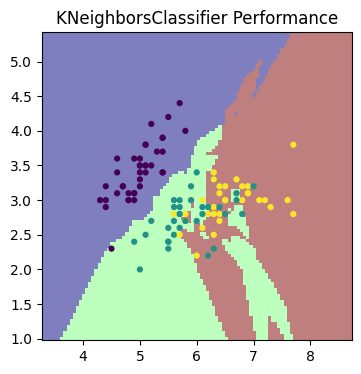

In [15]:
from sklearn.inspection import DecisionBoundaryDisplay
plot_kwargs = {'cmap': 'jet',     # another option: viridis
               'response_method': 'predict',
               'plot_method': 'pcolormesh',
               'shading': 'auto',
               'alpha': 0.5,
               'grid_resolution': 100}

figure, axes = plt.subplots(1, 1, figsize=(4,4))

DecisionBoundaryDisplay.from_estimator(learner_two, two_features, ax=axes, **plot_kwargs)
axes.scatter(two_features[:, 0], two_features[:, 1], c=y_train, edgecolor=None, s=12)
axes.set_title(f'KNeighborsClassifier Performance');

## Lets see if anything changes with adding more features!

In [17]:
learner_KNC = KNeighborsClassifier()
learner_KNC.fit(X_train, y_train)

prediction = learner_KNC.predict(X_test[0].reshape(1, -1))

print(f'Our predicted {prediction} and the actual values is {y_test[0]}')

Our predicted [1] and the actual values is 2


## Lets try another model!

Now we are going to try a decision tree

- Each input follows a series of "yes or no" questions to get to a certain result

In [19]:
from sklearn.tree import DecisionTreeClassifier

tree_learner = DecisionTreeClassifier()

tree_learner.fit(X_train, y_train)

predict_tree = tree_learner.predict(X_test[0].reshape(1, -1))

print(f'Our predicted {predict_tree} and the actual values is {y_test[0]}')

Our predicted [2] and the actual values is 2


Let's investigate the decisions our tree is making

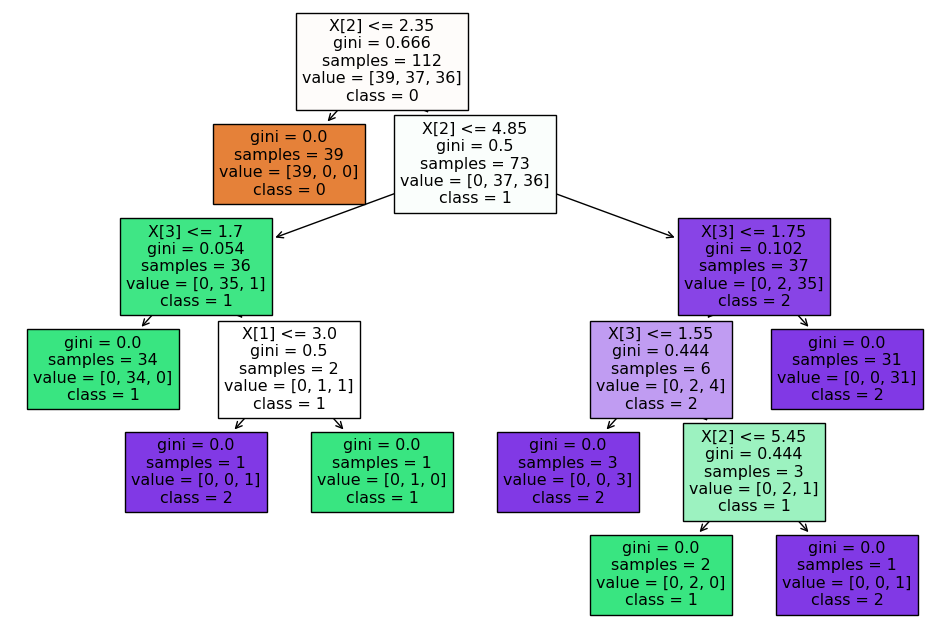

In [25]:
from sklearn import tree
plt.figure(figsize=(12, 8))
tree.plot_tree(tree_learner, class_names=np.unique(target).astype(str), filled=True)
plt.show()

## Now lets try a Multi Layer Perceptron

In [23]:
from sklearn.neural_network import MLPClassifier

MLP_learner =  MLPClassifier()

MLP_learner.fit(X_train, y_train)

MLP_learner_predict = MLP_learner.predict(X_test[0].reshape(1, -1))

print(f'Our predicted {MLP_learner_predict} and the actual values is {y_test[0]}')


Our predicted [2] and the actual values is 2
/root/venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Now that we have our models... how do we know which model did well?

While there are many heuristics to look at when evaluating your model's performance, we are going to focus on two today:

- Model Accuracy

- Overfitting vs.Underfitting

### Model Accuracy (How well does our model do on test data?)

To check our model accuracy we are going to take the zero-one-loss of our models

In [27]:
from sklearn.metrics import zero_one_loss
models = [learner_two,learner_KNC, tree_learner, MLP_learner]



for model in models:
    if model == learner_two:
        score = zero_one_loss(y_test, model.predict(X_test[:, 0:2]))
        print(f' {model} with two features has an accuracy of {1 - score}')
    else:
        score = zero_one_loss(y_test, model.predict(X_test))
        print(f'{model} has an accuracy of {1 - score}')




 KNeighborsClassifier() with two features has an accuracy of 0.8157894736842105
KNeighborsClassifier() has an accuracy of 0.9473684210526315
DecisionTreeClassifier() has an accuracy of 0.9473684210526315
MLPClassifier() has an accuracy of 0.9736842105263158


### Overfitting vs. Underfitting

To check for overfitting and underfitting we are going to compare our model's training data with their testing data

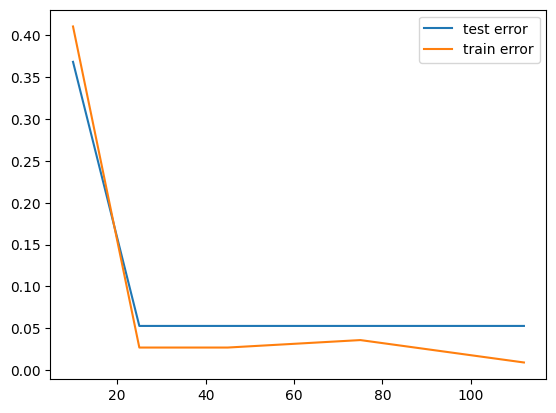

In [29]:
end_sizes = [10, 25, 45, 75, 112]
test_error = []
train_error = []




for end_size in end_sizes:
    model = KNeighborsClassifier()
    model.fit(X_train[0: end_size, : ], y_train[0: end_size])
    test_error.append(zero_one_loss(y_test, model.predict(X_test)))
    train_error.append(zero_one_loss(y_train, model.predict(X_train)))


plt.plot(end_sizes, test_error, label='test error')
plt.plot(end_sizes, train_error, label='train error')
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bea87c55-61ef-4ac9-9511-13cc119bae10' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>